# Generating tf-idf values for workshop descriptions

Takes advantage of Melanie Walsh's great work here: https://melaniewalsh.github.io/Intro-Cultural-Analytics/Text-Analysis/TF-IDF-Scikit-Learn.html



TODOS:
- [X] Remove numbers
- Drop to just unigrams and bigrams?
- [ ] Custom stopwords to remove standard text from descriptions that is about physical libraries, ask us, etc.
  - Can we remove chunks of text even we get to vectorizer?
- What are we doing with tf-idf values?
  - Try to match the tf-idf values with queries (queries could be from user or keywords from catalog/metadata)
- How often should the vector space be updated? For each new query or can we determine a standard set of features we expect for some time, and just project new items into that?

In [1]:
import nltk
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv("all-workshops-2021-02-04.csv")

In [3]:
df.head()

,Unnamed: 0,title,nid,field_time_d8,body,field_registration_url,field_non_library_instructor,field_workshop_leads_export,field_workshop_series,field_workshop_user_activities,field_non_libraries_space_1,field_space
0,0,Orientation: Digital Media Making in the Libra...,53062,02-04-2019 11:00AM to 02-04-2019 11:45AM,"Excited to make videos and movies, record podc...","<a href=""https://reporter.ncsu.edu/link/instan...",NaN,"[{'id': '504', 'url': 'https://www.lib.ncsu.ed...",Digital Media,NaN,NaN,"<a href=""/spaces/digital-media-lab"" hreflang=""..."
1,1,"MATLAByrinth Part 2: Getting Started, Part Two!",52895,02-04-2019 2:00PM to 02-04-2019 4:00PM,"MATLAByrinth, is a series of four comprehensiv...","<a href=""https://reporter.ncsu.edu/link/instan...","\nAmrutha Raghu, AmruthaRaghu.jpg\n\n",[],NaN,NaN,NaN,"<a href=""/spaces/teaching-and-visualization-la..."
2,2,Orientation: Digital Media Making in the Libra...,53194,02-04-2019 4:30PM to 02-04-2019 5:00PM,"Excited to make videos and movies, record podc...","<a href=""https://reporter.ncsu.edu/link/instan...",NaN,[],Digital Media,NaN,NaN,"<a href=""/spaces/4k-video-studio"" hreflang=""un..."
3,3,Orientation: Digital Media Making in the Libra...,53199,02-04-2019 4:30PM to 02-04-2019 5:00PM,"Excited to make videos and movies, record podc...","<a href=""https://reporter.ncsu.edu/link/instan...",NaN,[],Digital Media,NaN,NaN,"<a href=""/spaces/digital-media-lab"" hreflang=""..."
4,4,Virtual Reality Studio Orientation,53134,02-04-2019 6:00PM to 02-04-2019 7:00PM,This orientation is required to access the D. ...,"<a href=""https://reporter.ncsu.edu/link/instan...",\nAnthony Chaanine\n\n,[],Virtual and Augmented Reality,"Virtual Reality &amp; Augmented Reality, Virtu...",NaN,"<a href=""/spaces/vr-studio"" hreflang=""und"">VR ..."


In [4]:
def process_sent(sent):
    tokens = [token.strip() for token in nltk.word_tokenize(sent) if token.isalpha()]
    return " ".join(tokens)

In [5]:
def preprocess_text(text):
    """
    Remove non-alpha characters from the text
    - break into sentences
    - tokenize at word level
    - reconstitute sentence
    - reconstitute text
    """
    clean_sents = [process_sent(sent) for sent in nltk.sent_tokenize(text)]
    return ". ".join(clean_sents) 

In [6]:
df["cleaned_body"] = df["body"].apply(preprocess_text)

In [7]:
df["cleaned_body"][0]

'Excited to make videos and movies record podcasts and music digitize records cassettes and VHS tapes learn graphic design or make an awesome poster or presentation. You can do all of this and more utilizing the tools spaces and experts in Library Media Spaces like the Digital Media Lab Studio and Music Booths at Hill and the Media Production Studios and Music Rooms at Hunt. In this orientation you see the wide range of media making resources and instruction services at the Libraries see the green screen in action make a recording and get to know the people who help make it easy for you to make media'

In [8]:
corpus = df["cleaned_body"].to_list()

In [9]:
vectorizer = TfidfVectorizer(stop_words="english", ngram_range=(1, 2))

In [10]:
X = vectorizer.fit_transform(corpus)

In [11]:
X.shape

(1300, 14865)

In [12]:
tfidf_df = pd.DataFrame(X.toarray(), index=df["title"], columns=vectorizer.get_feature_names())

In [13]:
tfidf_df.head()

,abby,abby guillory,abilities,abilities impostor,abilities using,abilities workshop,ability,ability detect,ability join,ability solve,...,zoom kits,zoom link,zoom login,zoom meeting,zoom need,zoom situation,zoom submitted,zoom webconference,zoom webconferencing,zoom workshop
title,,,,,,,,,,,,,,,,,,,,,
Orientation: Digital Media Making in the Libraries,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"MATLAByrinth Part 2: Getting Started, Part Two!",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Orientation: Digital Media Making in the Libraries,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Orientation: Digital Media Making in the Libraries,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Virtual Reality Studio Orientation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
tfidf_df.loc["document_frequency"] = (tfidf_df > 0).sum()

In [15]:
tfidf_df.loc["document_frequency"]

abby                    6.0
abby guillory           6.0
abilities               3.0
abilities impostor      1.0
abilities using         1.0
                       ... 
zoom situation          1.0
zoom submitted          1.0
zoom webconference      1.0
zoom webconferencing    1.0
zoom workshop           1.0
Name: document_frequency, Length: 14865, dtype: float64

In [16]:
tfidf_df.loc["document_frequency"].sort_values()

looping                  1.0
microphones              1.0
michigan university      1.0
michigan                 1.0
mic session              1.0
                       ...  
library                580.0
orientation            638.0
required               678.0
learn                  718.0
hill                   769.0
Name: document_frequency, Length: 14865, dtype: float64

In [17]:
tfidf_df = tfidf_df.drop("document_frequency")

In [18]:
tfidf_df.stack().reset_index()

,title,level_1,0
0,Orientation: Digital Media Making in the Libra...,abby,0.0
1,Orientation: Digital Media Making in the Libra...,abby guillory,0.0
2,Orientation: Digital Media Making in the Libra...,abilities,0.0
3,Orientation: Digital Media Making in the Libra...,abilities impostor,0.0
4,Orientation: Digital Media Making in the Libra...,abilities using,0.0
...,...,...,...
19324495,IRB Basics: eIRB Application Workshop,zoom situation,0.0
19324496,IRB Basics: eIRB Application Workshop,zoom submitted,0.0
19324497,IRB Basics: eIRB Application Workshop,zoom webconference,0.0
19324498,IRB Basics: eIRB Application Workshop,zoom webconferencing,0.0


In [19]:
tfidf_df_stacked = tfidf_df.stack().reset_index() 

In [20]:
tfidf_df_stacked.columns

Index(['title', 'level_1', 0], dtype='object')

In [21]:
tfidf_df_stacked.columns = ["title", "term", "tfidf"]
tfidf_df_stacked.head()

,title,term,tfidf
0,Orientation: Digital Media Making in the Libra...,abby,0.0
1,Orientation: Digital Media Making in the Libra...,abby guillory,0.0
2,Orientation: Digital Media Making in the Libra...,abilities,0.0
3,Orientation: Digital Media Making in the Libra...,abilities impostor,0.0
4,Orientation: Digital Media Making in the Libra...,abilities using,0.0


In [22]:
tfidf_df_stacked.sort_values(by=['title', 'tfidf'], ascending=[True, False]).groupby(["title"]).head(10)

,title,term,tfidf
14882811,Introduction to Data Management Plans for Res...,data management,0.335433
14887476,Introduction to Data Management Plans for Res...,management,0.273128
14882750,Introduction to Data Management Plans for Res...,data,0.244584
14894152,Introduction to Data Management Plans for Res...,water,0.180594
14887485,Introduction to Data Management Plans for Res...,management plan,0.175698
...,...,...,...
5436158,"You buy a pair of shoes online, you get an adv...",recommendation,0.126235
5436136,"You buy a pair of shoes online, you get an adv...",recent,0.118691
5439537,"You buy a pair of shoes online, you get an adv...",user,0.083393
5435929,"You buy a pair of shoes online, you get an adv...",python,0.078872


In [23]:
top_tfidf = tfidf_df_stacked.sort_values(by=['title', 'tfidf'], ascending=[True, False]).groupby(["title"]).head(10)

In [84]:
top_tfidf.to_csv("workshops_tfidf.csv")

In [24]:
top_tfidf[top_tfidf["term"].str.contains("python")]

,title,term,tfidf
248044,Data Cleaning with Python,python,0.214827
1511569,Data Cleaning with Python,python,0.214827
246740,Data Cleaning with Python,package python,0.179204
16257649,Data Manipulation with Python,python,0.170142
16346839,Data Visualization with Python,python,0.169086
16376569,Data Visualization with Python,python,0.169086
17506309,Data Visualization with Python,python,0.169086
6194044,Introduction to Computer Vision and Image Proc...,python,0.213199
16213054,Introduction to Programming with Python,python,0.159838
17164414,Introduction to Programming with Python,python,0.159838


In [25]:
top_tfidf[top_tfidf["term"].str.contains("visualization")]

,title,term,tfidf
2261352,Beginning R,cleaning visualization,0.171954
6688538,Data Visualization with R,visualizations,0.211012
9483158,Data Visualization with R,visualizations,0.211012
12143993,Data Visualization with R,visualizations,0.211012
15429158,Data Visualization with R,visualizations,0.211012
415488,Elements of Visualization Design,visualization,0.229342
8992593,Elements of Visualization Design,visualization,0.229342
11014233,Elements of Visualization Design,visualization,0.229342
14507508,Elements of Visualization Design,visualization,0.229342
18119703,Elements of Visualization Design,visualization,0.229342


In [26]:
# Notice that titles are still case sensitive
top_tfidf[top_tfidf["title"].str.contains("Python")]

,title,term,tfidf
248044,Data Cleaning with Python,python,0.214827
1511569,Data Cleaning with Python,python,0.214827
239214,Data Cleaning with Python,bring,0.196652
1502739,Data Cleaning with Python,bring,0.196652
239571,Data Cleaning with Python,check library,0.179204
...,...,...,...
17589956,Webscraping with Python,file ll,0.126612
17591387,Webscraping with Python,information page,0.126612
17591400,Webscraping with Python,information structured,0.126612
17591808,Webscraping with Python,involved webscraping,0.126612


Let's visualize the document embedding using t-sne to determine if there are evident clusters, before using a clustering algorithm

In [12]:
from sklearn.manifold import TSNE

In [13]:
X_embedded = TSNE(n_components=2).fit_transform(X)

In [14]:
X_embedded.shape

(1300, 2)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [21]:
df_embed = pd.DataFrame(X_embedded, columns=["x", "y"])
df_embed.head()

,x,y
0,10.814481,16.604996
1,-17.479837,-5.098377
2,10.812210,16.604836
3,10.935487,16.035099
4,-13.203839,29.825724


<AxesSubplot:xlabel='x', ylabel='y'>

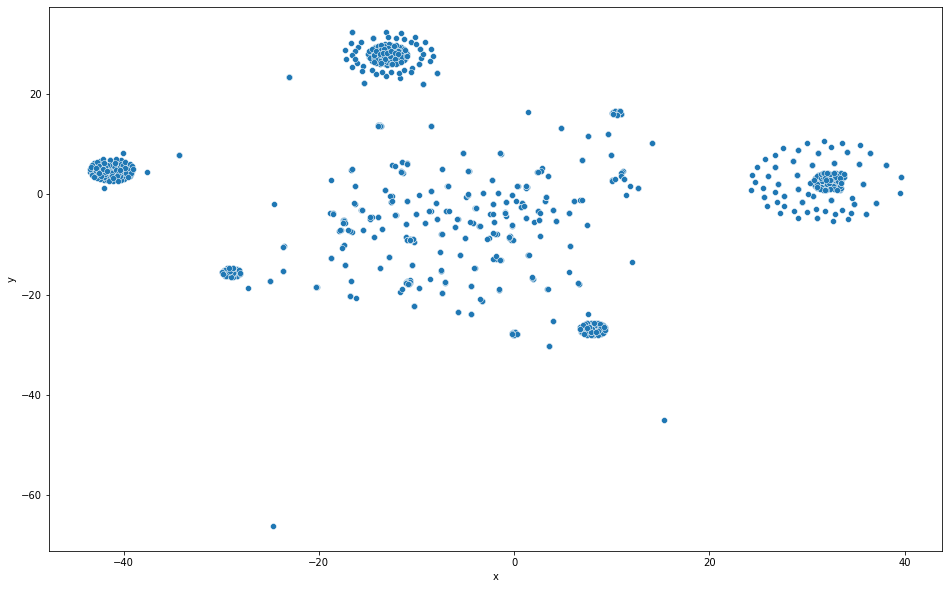

In [24]:
plt.figure(figsize=(16,10))
sns.scatterplot(data=df_embed, x="x", y="y")

We can see visible clusters, but let's rerun with truncatedSVD to reduce dimensions first to see if there is any improvement. We need truncatedSVD since we have a sparse matrix.

In [27]:
from sklearn.decomposition import TruncatedSVD

In [28]:
svd = TruncatedSVD(n_components = 50)
svd_embed = svd.fit_transform(X)

In [40]:
X_svd_tsne_embed = TSNE(n_components=2, perplexity=50).fit_transform(svd_embed)
X_svd_tsne_embed.shape

(1300, 2)

In [41]:
df_svd_embed = pd.DataFrame(X_svd_tsne_embed, columns=["x", "y"])
df_svd_embed.head()

,x,y
0,13.108759,17.017845
1,3.225604,-22.127838
2,12.915992,17.000017
3,13.084056,17.177044
4,5.414789,45.180138


<AxesSubplot:xlabel='x', ylabel='y'>

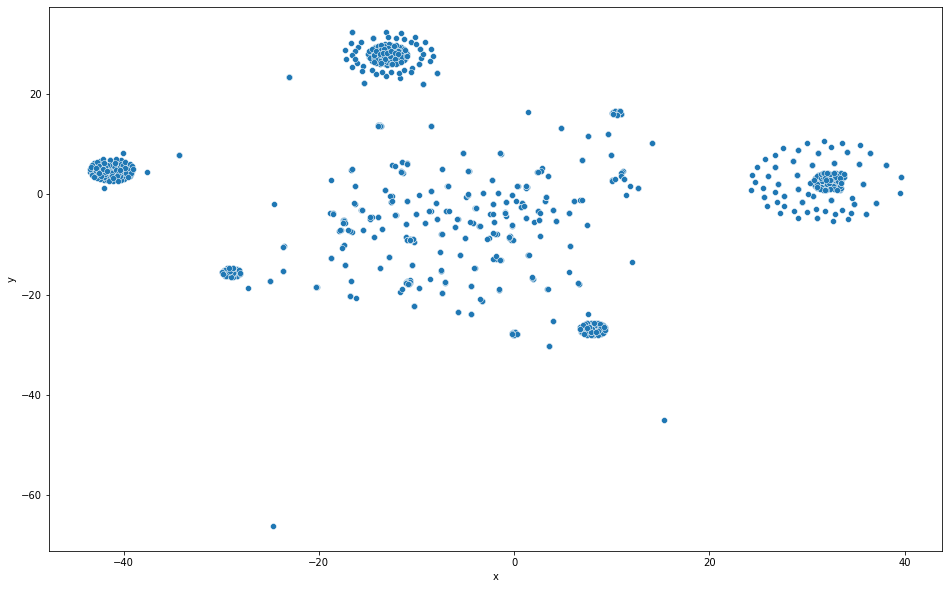

In [42]:
plt.figure(figsize=(16,10))
sns.scatterplot(data=df_embed, x="x", y="y")

The data are already sufficiently clear in their clustering that a first-step dimensionality reduction prior to t-SNE seems unnecessary. 